# Product Recommendation
**Subject:** BADS 7105 - CRM Analytics and Intelligence  
Timpika Aungnoi 6310412025


# Initialization

In [1]:
!pip install mlxtend

In [2]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 42.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=4eeb4f6c10f4ace60d8a6bfec2ad8ce9fc9d4ae0bb278bb17d70d2d013d075c8
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=87fd898a0387333d91735f7deaeb3252129dc0a35f5616e2d2f61817814004a6
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

import pandas as pd



In [4]:
## mount__drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Prod_Rec.csv') 

In [6]:
#import matplotlib as mpl
#mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/fonts/K2D-Regular.ttf')
#mpl.rc('font', family='K2D', size=12, weight=200)

# Data Cleansing

Skip this, after executing once.

In [7]:
#filename = 'Prod_Rec.csv'
#df = pd.read_csv(filename)
print(df.shape)
df.head(10)

(29, 28)


,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
6,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
7,10/28/2021 14:06,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
8,10/28/2021 14:06,NaN,NaN,ไม่เคย,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
9,10/28/2021 14:06,ไม่เคยซื้อ,ตัวเลือก 1,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [8]:
df.isnull().sum()

Timestamp                                  0
โปรแกรมแท้                                14
เครื่องซักผ้า                             14
NONE                                      12
รองเท้าวิ่ง                                0
ผักกรอบ                                    0
คอร์สเรียนเสริม                            0
nintendo switch                            0
BTC (Bitcoin)                              0
mechanical keyboard                        0
เครื่องดูดฝุ่น Dyson                       0
เคส ipad                                   0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่             0
สินค้าจากพิมรี่พาย                         0
I PHONE 13                                 0
หูฟัง bluetooth (airpods,truewireless)     0
แก้วน้ำ Starbucks                          1
เบาะรองนั่ง                                0
เครื่องชงกาแฟแคปซูล                        0
ตั๋วเครื่องบินไปญี่ปุ่น                    0
Ebook                                      0
ตู้เย็น                                    0
กล้องฟิล์ม

In [9]:
#df.drop('NONE',axis='columns', inplace=True)
#df.drop('Timestamp',axis='columns', inplace=True)

In [10]:
# remove first 4 rows , there re some product that user didn't choose quite much. 
prep = df.iloc[: , 4:].reset_index(drop=True).rename_axis('student').copy()
prep.head()

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,
0,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [11]:
df = df.fillna('ไม่เคยซือ')

In [12]:
df.isnull().sum()

Timestamp                                 0
โปรแกรมแท้                                0
เครื่องซักผ้า                             0
NONE                                      0
รองเท้าวิ่ง                               0
ผักกรอบ                                   0
คอร์สเรียนเสริม                           0
nintendo switch                           0
BTC (Bitcoin)                             0
mechanical keyboard                       0
เครื่องดูดฝุ่น Dyson                      0
เคส ipad                                  0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่            0
สินค้าจากพิมรี่พาย                        0
I PHONE 13                                0
หูฟัง bluetooth (airpods,truewireless)    0
แก้วน้ำ Starbucks                         0
เบาะรองนั่ง                               0
เครื่องชงกาแฟแคปซูล                       0
ตั๋วเครื่องบินไปญี่ปุ่น                   0
Ebook                                     0
ตู้เย็น                                   0
กล้องฟิล์ม                      

In [13]:
#prep = prep.rename(columns={''})

In [14]:
# check unique values, and NaN
prep.melt()['value'].value_counts(dropna=False)

ไม่เคยซื้อ    426
เคยซื้อ       240
ไม่เคย         17
เคย            12
NaN             1
Name: value, dtype: int64

In [15]:
prep[prep.isna().sum(axis=1) > 0].style.apply(lambda x: ["background-color: red" if v is np.nan else "" for v in x], axis=1)

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,
17,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,nan,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [16]:
# Impute nah -> ไม่เคย
prep.fillna('ไม่เคย', inplace=True)
prep.isna().any().sum()

0

In [17]:
prep.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
prep.replace({'เคยซื้อ': 1, 'ไม่เคยซื้อ': 0}, inplace=True)
prep.head(28)

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1
6,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1
8,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0


In [18]:
prep.isnull().sum()

รองเท้าวิ่ง                               0
ผักกรอบ                                   0
คอร์สเรียนเสริม                           0
nintendo switch                           0
BTC (Bitcoin)                             0
mechanical keyboard                       0
เครื่องดูดฝุ่น Dyson                      0
เคส ipad                                  0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่            0
สินค้าจากพิมรี่พาย                        0
I PHONE 13                                0
หูฟัง bluetooth (airpods,truewireless)    0
แก้วน้ำ Starbucks                         0
เบาะรองนั่ง                               0
เครื่องชงกาแฟแคปซูล                       0
ตั๋วเครื่องบินไปญี่ปุ่น                   0
Ebook                                     0
ตู้เย็น                                   0
กล้องฟิล์ม                                0
เครื่องดนตรี                              0
whey protein                              0
วัตถุมงคล                                 0
กระบองเพชรพูดได้                

In [19]:
prep = prep.fillna(0)
prep.head(29)

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1
6,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1
8,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0


In [20]:
list(prep.columns.values)

['รองเท้าวิ่ง',
 'ผักกรอบ',
 'คอร์สเรียนเสริม',
 'nintendo switch',
 'BTC (Bitcoin)',
 'mechanical keyboard',
 'เครื่องดูดฝุ่น Dyson',
 'เคส ipad',
 'คุณเคยซื้อโต๊ะปรับระดับหรือไม่',
 'สินค้าจากพิมรี่พาย',
 'I PHONE 13',
 'หูฟัง bluetooth (airpods,truewireless)',
 'แก้วน้ำ Starbucks',
 'เบาะรองนั่ง',
 'เครื่องชงกาแฟแคปซูล',
 'ตั๋วเครื่องบินไปญี่ปุ่น',
 'Ebook',
 'ตู้เย็น',
 'กล้องฟิล์ม',
 'เครื่องดนตรี',
 'whey protein',
 'วัตถุมงคล ',
 'กระบองเพชรพูดได้',
 'ROV Skin']

In [21]:
prep.columns

Index(['รองเท้าวิ่ง', 'ผักกรอบ', 'คอร์สเรียนเสริม', 'nintendo switch',
       'BTC (Bitcoin)', 'mechanical keyboard', 'เครื่องดูดฝุ่น Dyson',
       'เคส ipad', 'คุณเคยซื้อโต๊ะปรับระดับหรือไม่', 'สินค้าจากพิมรี่พาย',
       'I PHONE 13', 'หูฟัง bluetooth (airpods,truewireless)',
       'แก้วน้ำ Starbucks', 'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล',
       'ตั๋วเครื่องบินไปญี่ปุ่น', 'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม',
       'เครื่องดนตรี', 'whey protein', 'วัตถุมงคล ', 'กระบองเพชรพูดได้',
       'ROV Skin'],
      dtype='object')

In [22]:
#prep_stacked = prep.stack()
#print(prep_stacked.head(30))

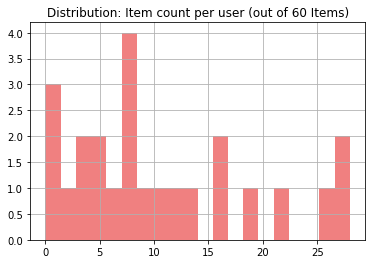

In [23]:
#Item count per User
prep.sum().hist(bins=20, color='lightcoral')
plt.title('Distribution: Item count per user (out of 60 Items)')
plt.show()

**Market Basket Analysis**

Frequent Itemsets & Associations Rules

In [24]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [27]:
# calculate frequent itemsets
frequent_itemsets = apriori(prep, min_support=0.5, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

print(frequent_itemsets.shape)
frequent_itemsets.head()

(37, 2)


,support,itemsets
0,0.965517,(รองเท้าวิ่ง)
1,0.931034,(คอร์สเรียนเสริม)
2,0.896552,(เคส ipad)
3,0.896552,"(รองเท้าวิ่ง, คอร์สเรียนเสริม)"
4,0.862069,"(รองเท้าวิ่ง, เคส ipad)"


In [28]:
# generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.shape)
rules.sort_values('lift',ascending=False).head(15)

(108, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,"(เคส ipad, คอร์สเรียนเสริม)","(รองเท้าวิ่ง, เบาะรองนั่ง)",0.827586,0.517241,0.517241,0.625000,1.208333,0.089180,1.287356
100,"(รองเท้าวิ่ง, เบาะรองนั่ง)","(เคส ipad, คอร์สเรียนเสริม)",0.517241,0.827586,0.517241,1.000000,1.208333,0.089180,inf
69,"(เคส ipad, คอร์สเรียนเสริม)",(เบาะรองนั่ง),0.827586,0.551724,0.551724,0.666667,1.208333,0.095125,1.344828
72,(เบาะรองนั่ง),"(เคส ipad, คอร์สเรียนเสริม)",0.551724,0.827586,0.551724,1.000000,1.208333,0.095125,inf
106,(เบาะรองนั่ง),"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",0.551724,0.793103,0.517241,0.937500,1.182065,0.079667,3.310345
97,"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",(เบาะรองนั่ง),0.793103,0.551724,0.517241,0.652174,1.182065,0.079667,1.288793
95,(เครื่องดนตรี),"(เคส ipad, คอร์สเรียนเสริม)",0.551724,0.827586,0.517241,0.937500,1.132813,0.060642,2.758621
90,"(เคส ipad, คอร์สเรียนเสริม)",(เครื่องดนตรี),0.827586,0.551724,0.517241,0.625000,1.132812,0.060642,1.195402
63,(Ebook),"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",0.655172,0.793103,0.586207,0.894737,1.128146,0.066587,1.965517
50,"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",(Ebook),0.793103,0.655172,0.586207,0.739130,1.128146,0.066587,1.321839


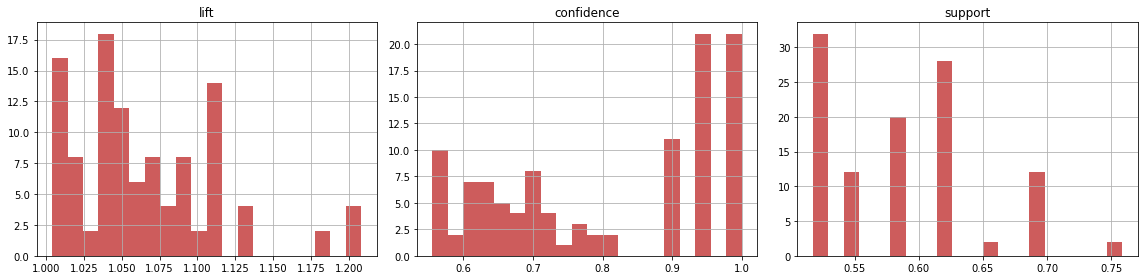

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='indianred')
    ax.set_title(var)
plt.show()

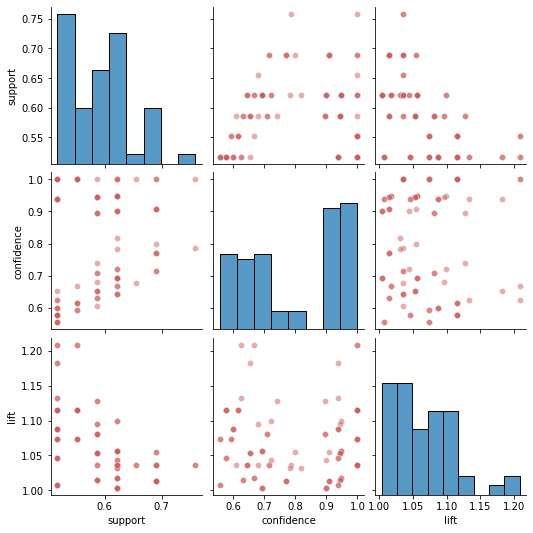

In [31]:
sns.pairplot(rules, vars=['support','confidence','lift'], plot_kws = {'color':'indianred', 'alpha':.5});


**Visualize Rules of 1-itemsets**

In [30]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(prep , min_support=0.5, use_colnames=True)

In [34]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
1,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
2,(รองเท้าวิ่ง),(Ebook),0.965517,0.655172,0.655172,0.678571,1.035714,0.022592,1.072797
3,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
5,(คอร์สเรียนเสริม),(เบาะรองนั่ง),0.931034,0.551724,0.551724,0.592593,1.074074,0.038050,1.100313
6,(คอร์สเรียนเสริม),(Ebook),0.931034,0.655172,0.620690,0.666667,1.017544,0.010702,1.034483
7,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
8,(คอร์สเรียนเสริม),(เครื่องดนตรี),0.931034,0.551724,0.517241,0.555556,1.006944,0.003567,1.008621
9,(เครื่องดนตรี),(คอร์สเรียนเสริม),0.551724,0.931034,0.517241,0.937500,1.006944,0.003567,1.103448


In [35]:
#unsorted by support for conclusion 
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
1,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
2,(รองเท้าวิ่ง),(Ebook),0.965517,0.655172,0.655172,0.678571,1.035714,0.022592,1.072797
3,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
4,(เบาะรองนั่ง),(คอร์สเรียนเสริม),0.551724,0.931034,0.551724,1.000000,1.074074,0.038050,inf
...,...,...,...,...,...,...,...,...,...
103,"(คอร์สเรียนเสริม, Ebook)","(รองเท้าวิ่ง, เคส ipad)",0.620690,0.862069,0.586207,0.944444,1.095556,0.051130,2.482759
104,(รองเท้าวิ่ง),"(เคส ipad, คอร์สเรียนเสริม, Ebook)",0.965517,0.586207,0.586207,0.607143,1.035714,0.020214,1.053292
105,(เคส ipad),"(รองเท้าวิ่ง, คอร์สเรียนเสริม, Ebook)",0.896552,0.620690,0.586207,0.653846,1.053419,0.029727,1.095785
106,(คอร์สเรียนเสริม),"(รองเท้าวิ่ง, เคส ipad, Ebook)",0.931034,0.620690,0.586207,0.629630,1.014403,0.008323,1.024138


In [36]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.756705,0.756705,0.586845,0.804757,1.065773,0.033712,inf
std,0.153694,0.153694,0.060920,0.160136,0.049454,0.021902,NaN
min,0.517241,0.517241,0.517241,0.555556,1.003846,0.002378,1.008621
25%,0.620690,0.620690,0.517241,0.653428,1.035714,0.020214,1.095785
50%,0.775862,0.775862,0.586207,0.809091,1.053982,0.031510,1.182266
75%,0.896552,0.896552,0.620690,0.945175,1.095556,0.051130,2.206897
max,0.965517,0.965517,0.758621,1.000000,1.208333,0.095125,inf


In [37]:
rules.head(1000).sort_values(by=['support'],ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,"(รองเท้าวิ่ง, เคส ipad, เบาะรองนั่ง)",(คอร์สเรียนเสริม),0.517241,0.931034,0.517241,1.000000,1.074074,0.035672,inf
24,(เบาะรองนั่ง),"(รองเท้าวิ่ง, คอร์สเรียนเสริม)",0.551724,0.896552,0.517241,0.937500,1.045673,0.022592,1.655172
49,"(รองเท้าวิ่ง, เครื่องดนตรี)",(เคส ipad),0.517241,0.896552,0.517241,1.000000,1.115385,0.053508,inf
92,(เบาะรองนั่ง),"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",0.551724,0.793103,0.517241,0.937500,1.182065,0.079667,3.310345
91,(เคส ipad),"(รองเท้าวิ่ง, เบาะรองนั่ง, คอร์สเรียนเสริม)",0.896552,0.517241,0.517241,0.576923,1.115385,0.053508,1.141066
...,...,...,...,...,...,...,...,...,...
35,(รองเท้าวิ่ง),"(เคส ipad, หูฟัง bluetooth (airpods,truewirele...",0.965517,0.689655,0.689655,0.714286,1.035714,0.023781,1.086207
34,"(เคส ipad, หูฟัง bluetooth (airpods,truewirele...",(รองเท้าวิ่ง),0.689655,0.965517,0.689655,1.000000,1.035714,0.023781,inf
33,"(รองเท้าวิ่ง, หูฟัง bluetooth (airpods,truewir...",(เคส ipad),0.758621,0.896552,0.689655,0.909091,1.013986,0.009512,1.137931
1,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf


In [38]:
ABSOLUTE = rules[rules['confidence'] ==  1]

In [39]:
ABSOLUTEHEAD10 = ABSOLUTE.head(10).sort_values(by=['lift'],ascending=False)

In [40]:
import matplotlib.pyplot as plt
import networkx as nx
item_item_matrix = pd.DataFrame(index=prep.columns,columns=prep.columns)

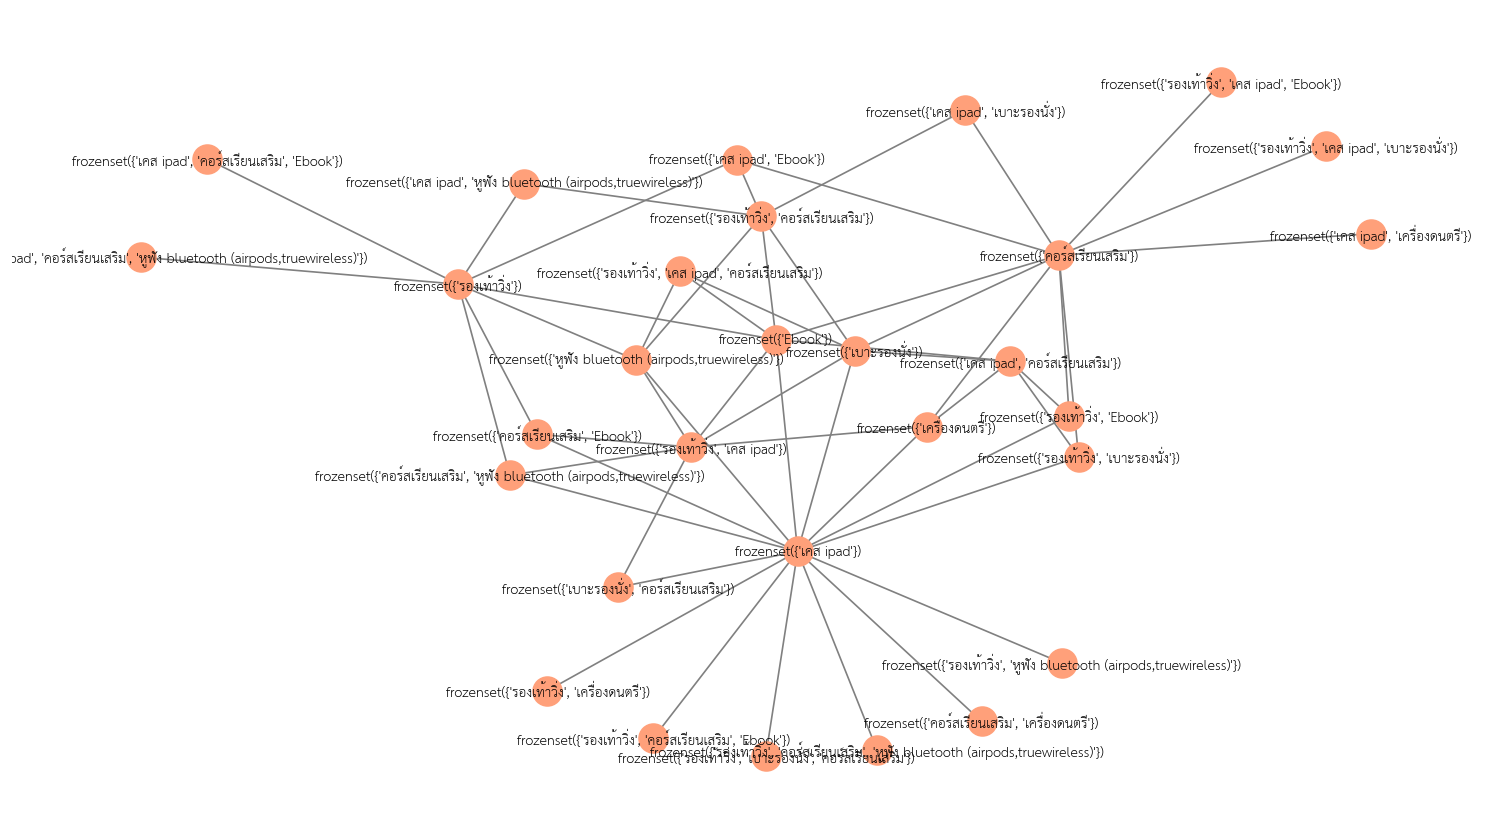

In [42]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)
 
plt.rcParams['font.family'] ='TH Sarabun New'
labels_params = {'font_family': 'TH Sarabun New', 'alpha':1, 'font_size':12, 'font_color':"black",'font_weight':500,'edge_color':'grey','node_color':'lightsalmon'}
fig, ax=plt.subplots(figsize=[16,9],dpi=120)
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True, **labels_params)
plt.show()

In [ ]:
#item_item_matrix = pd.DataFrame(index=prep.columns,columns=prep.columns)

In [ ]:
#import matplotlib.pyplot as plt
#import networkx as nx

#fig, ax=plt.subplots(figsize=(10,4))
#GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
#nx.draw(GA,with_labels=True)
#plt.show()

# Collaborative Filtering - Item Similarity



In [43]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    #Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      #Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(prep.iloc[:,i],prep.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [44]:
links = item_item_matrix.rename_axis('related item', axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']
links.head()

,item,related item,value
0,รองเท้าวิ่ง,รองเท้าวิ่ง,1
1,รองเท้าวิ่ง,ผักกรอบ,0.597614
2,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.945611
3,รองเท้าวิ่ง,nintendo switch,0.5
4,รองเท้าวิ่ง,BTC (Bitcoin),0.681385


In [45]:
links_filtered=links.loc[ (links['value'] > 0.1) & (links['item'] != links['related item']) ]
links_filtered.head()

,item,related item,value
1,รองเท้าวิ่ง,ผักกรอบ,0.597614
2,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.945611
3,รองเท้าวิ่ง,nintendo switch,0.5
4,รองเท้าวิ่ง,BTC (Bitcoin),0.681385
5,รองเท้าวิ่ง,mechanical keyboard,0.422577


In [46]:
links_filtered.describe()

,item,related item,value
count,428,428,428.000000
unique,23,23,134.000000
top,คอร์สเรียนเสริม,คอร์สเรียนเสริม,0.377964
freq,22,22,12.000000


In [47]:
links_filtered['item'].unique()
#IPHONE 13 is disappeared 

array(['รองเท้าวิ่ง', 'ผักกรอบ', 'คอร์สเรียนเสริม', 'nintendo switch',
       'BTC (Bitcoin)', 'mechanical keyboard', 'เครื่องดูดฝุ่น Dyson',
       'เคส ipad', 'คุณเคยซื้อโต๊ะปรับระดับหรือไม่', 'สินค้าจากพิมรี่พาย',
       'หูฟัง bluetooth (airpods,truewireless)', 'แก้วน้ำ Starbucks',
       'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล', 'ตั๋วเครื่องบินไปญี่ปุ่น',
       'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม', 'เครื่องดนตรี', 'whey protein',
       'วัตถุมงคล ', 'กระบองเพชรพูดได้', 'ROV Skin'], dtype=object)

In [48]:
prep.columns

Index(['รองเท้าวิ่ง', 'ผักกรอบ', 'คอร์สเรียนเสริม', 'nintendo switch',
       'BTC (Bitcoin)', 'mechanical keyboard', 'เครื่องดูดฝุ่น Dyson',
       'เคส ipad', 'คุณเคยซื้อโต๊ะปรับระดับหรือไม่', 'สินค้าจากพิมรี่พาย',
       'I PHONE 13', 'หูฟัง bluetooth (airpods,truewireless)',
       'แก้วน้ำ Starbucks', 'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล',
       'ตั๋วเครื่องบินไปญี่ปุ่น', 'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม',
       'เครื่องดนตรี', 'whey protein', 'วัตถุมงคล ', 'กระบองเพชรพูดได้',
       'ROV Skin'],
      dtype='object')

In [49]:
import matplotlib as mpl
mpl.__version__

'3.2.2'

In [50]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

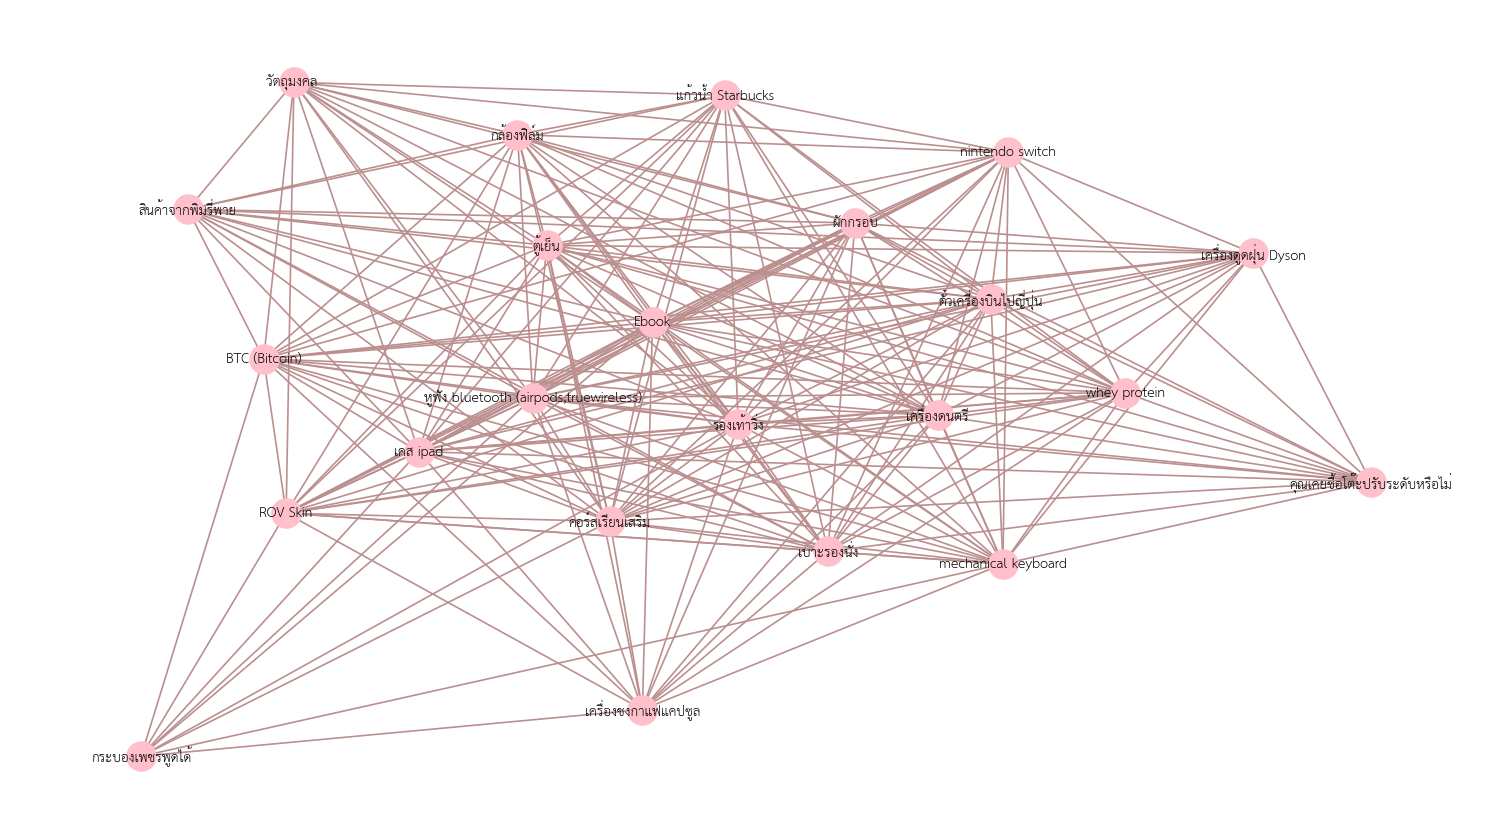

In [51]:
plt.rcParams['font.family'] ='TH Sarabun New'
labels_params = {'font_family': 'TH Sarabun New', 'alpha':1, 'font_size':12, 'font_color':"black",'font_weight':500,'edge_color':'rosybrown','node_color':'pink'}
fig, ax=plt.subplots(figsize=[16,9],dpi=120)
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True, **labels_params)
plt.show()